# Introduction

<font style="color:#ccc">
Some text about titanic

Content:

1.[Load and check data](#1) <br>
2.[Variable Explanation](#2) <br>
3.[Univariate Variable Analysis](#3) <br>

* Categorical Variable <br>
* Numerical Variable <br>

4.[Basic Data Analysis](#6) <br>
5.[Outlier Detection](#7) <br>
6.[Missing Value](#8) <br>

* Find Missing value
* Fill Missing value <br>

7.[Visualization](#9) <br>

* Correlation between "Age" - "SibSp" - "Parch" -  "Fare" - "Survived" <br>
* "SibSp" - "Survived" <br>
* "Parch" - "Survived" <br>
* "Pclass" - "Survived" <br>
* "Age" - "Survived" <br>
* "Pclass" - "Survived" - "Age" <br>
* "Embarked" - "Sex" - "Pclass" - "Survived" <br>
* "Embarked" - "Sex" - "Fare" - "Survived" <br>

8.[Fill missing: Age Feature](#10) <br>
    


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno
from collections import Counter
plt.style.use("seaborn-darkgrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

<a id="1"></a>
# Load and Check Data

In [2]:
#Load data from .csv files
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

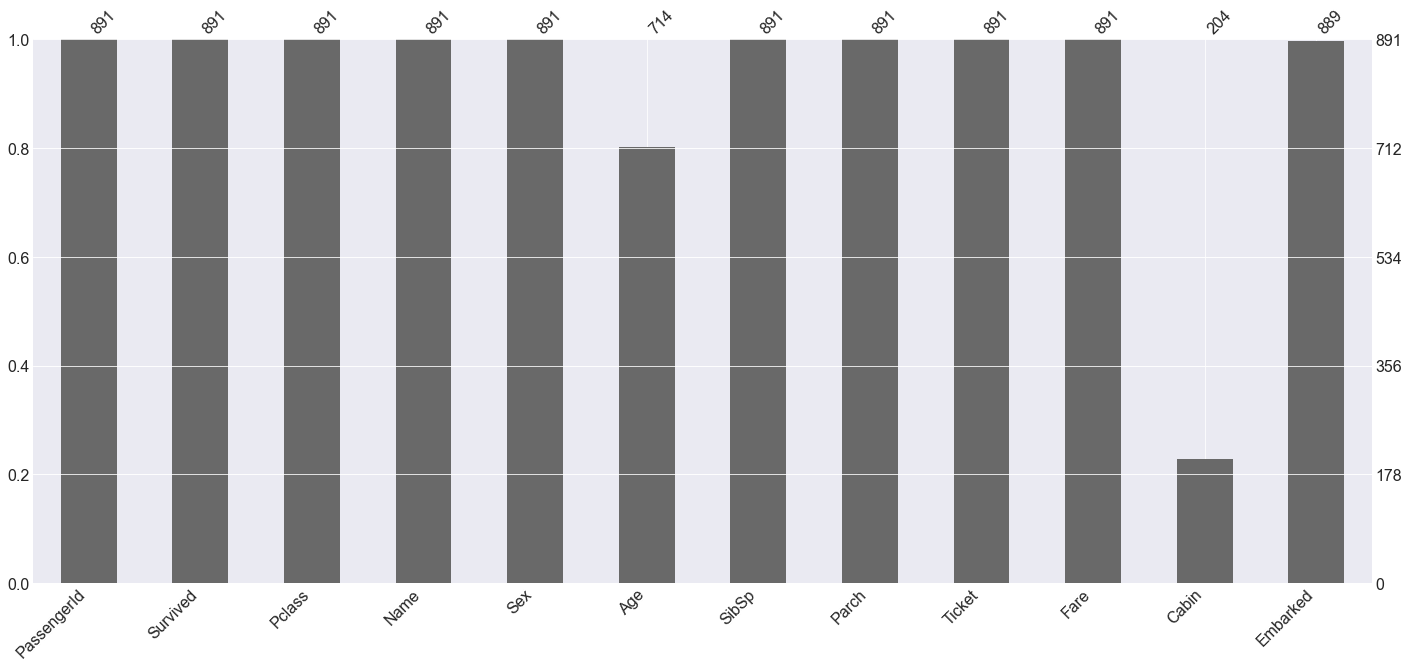

In [3]:
#check nan values
msno.bar(train_df)

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="2"></a>
# Variable Explanation

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2) -> Age, Fare
* int64(5) -> PassengerId, Survived, Pclass, SibSp, Parch
* object(5) -> Name, Sex, Ticket, Cabin, Embarked

<a id="3"><a>
# Univariate Variable Analysis <br>
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

<a id="4"></a>
### Categorical Variable 

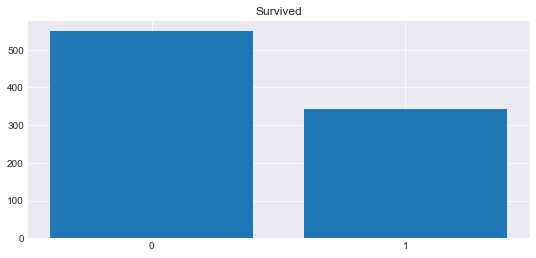

-> Survived
0    549
1    342
Name: Survived, dtype: int64


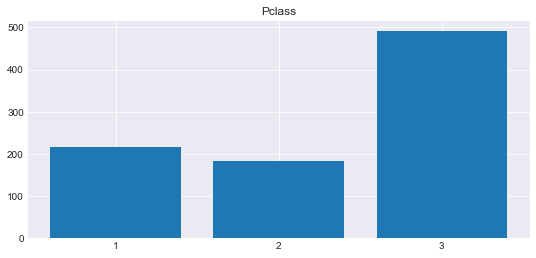

-> Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


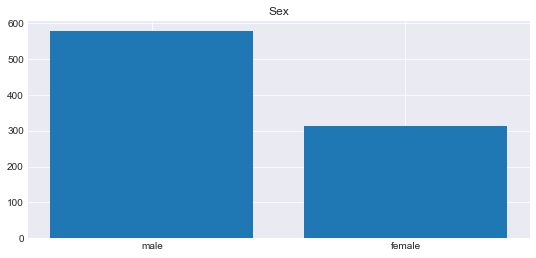

-> Sex
male      577
female    314
Name: Sex, dtype: int64


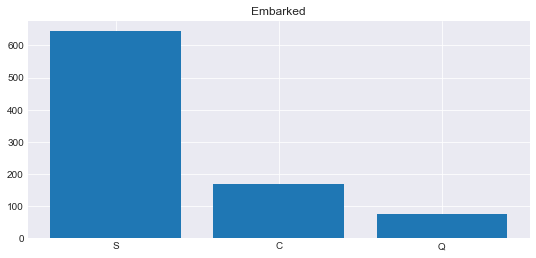

-> Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


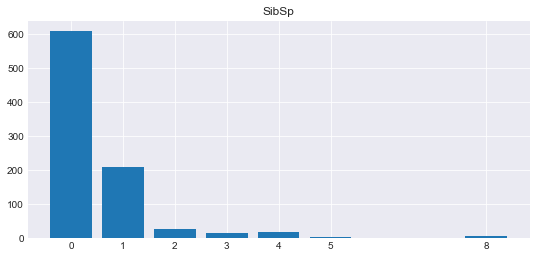

-> SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


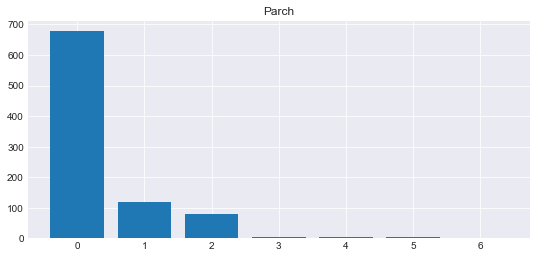

-> Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [7]:
def bar_plot(column):
    vc = train_df[column].value_counts()
    fig = plt.figure(figsize=(9, 4))
    plt.bar(vc.index, vc.values)
    plt.xticks(vc.index)
    plt.title(column)
    plt.show()
    print("-> {}\n{}".format(column, vc))

category1 = ["Survived", "Pclass", "Sex", "Embarked", "SibSp", "Parch"] #easy to understand from plot

for category in category1:
    bar_plot(category)

In [8]:
category2 = ["Cabin", "Name", "Ticket"]

for category in category2:
    print("-> {}\n{}".format(category, train_df[category].value_counts()))
    print("------------------------")

-> Cabin
G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F2             3
              ..
C82            1
E38            1
C106           1
A20            1
E36            1
Name: Cabin, Length: 147, dtype: int64
------------------------
-> Name
Frolicher-Stehli, Mr. Maxmillian             1
Porter, Mr. Walter Chamberlain               1
Windelov, Mr. Einar                          1
Maioni, Miss. Roberta                        1
Tobin, Mr. Roger                             1
                                            ..
Touma, Mrs. Darwis (Hanne Youssef Razi)      1
Rosblom, Mrs. Viktor (Helena Wilhelmina)     1
Mellinger, Mrs. (Elizabeth Anne Maidment)    1
Kent, Mr. Edward Austin                      1
Coutts, Master. Eden Leslie "Neville"        1
Name: Name, Length: 891, dtype: int64
------------------------
-> Ticket
347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
           ..
C 7075      1
350036      1
345765      1
229236      1
75

<a id="5"></a>
### Numerical Variable 

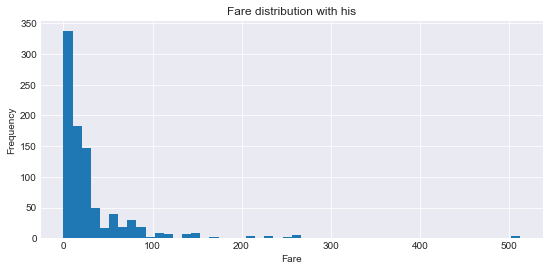

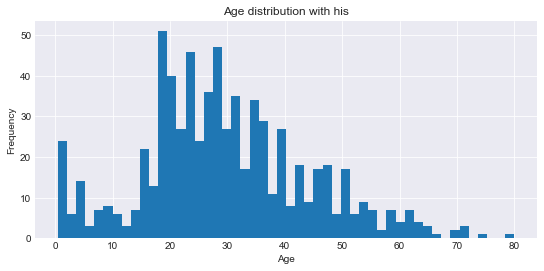

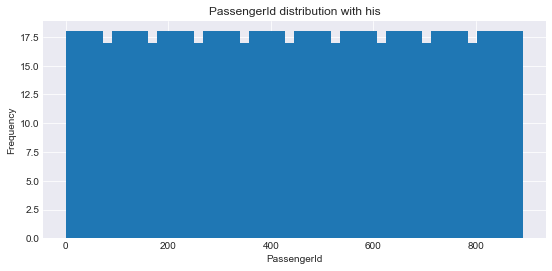

In [9]:
def hist_plot(column):
    fig = plt.figure(figsize=(9, 4))
    plt.hist(train_df[column], bins=50)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title("{} distribution with his".format(column))
    plt.show()

n_category = ["Fare", "Age", "PassengerId"]

for category in n_category:
    hist_plot(category)



<a id="6"></a>
# Basic Data Analysis

Explore data to see relationships between attributes and survivers

* Survived - Pclass
* Survived - Sex
* Survived - Age
* Survived - SibSp
* Survived - Parch
* Survived - Fare

### Categorical Variables

In [10]:
def grouped_mean(column):
    relation_df = train_df[[column, "Survived"]].groupby([column], as_index=False).mean().sort_values(by="Survived", ascending=False)
    print("-> {}\n{}".format(column, relation_df))

In [11]:
grouped_mean("Pclass")

-> Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [12]:
grouped_mean("Sex")

-> Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908


In [13]:
grouped_mean("SibSp")

-> SibSp
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [14]:
grouped_mean("Parch")

-> Parch
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


In [15]:
grouped_mean("Embarked")

-> Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


### Numerical Variables
It is easy to group categorical variable but we should divide numerical range to equal parts for calculating survived ratio inside parts.(like "Age" and "Fare")


In [16]:
#FOR AGE
#calculate survive ratio from given survive list
def survived(survive_list):
    surv = 0
    for index, value in enumerate(survive_list):
        if value == 1:
            surv += 1
    return surv / len(survive_list)

age_df = pd.DataFrame(columns=["age_interval", "survived"])

for _i in range(0, 71, 10):
    str_value = str(_i) + "-" + str(_i + 10)
    interval = train_df[(train_df["Age"] >= _i) & (train_df["Age"] <= _i + 10)].Survived
    age_df = age_df.append({"age_interval" : str_value, "survived" : survived(interval)}, ignore_index=True)

age_df.sort_values(by="survived", ascending=False)


,age_interval,survived
0,0-10,0.593750
3,30-40,0.438889
5,50-60,0.423077
4,40-50,0.393939
1,10-20,0.376068
2,20-30,0.355102
6,60-70,0.285714
7,70-80,0.142857


In [17]:
# FOR FARE
fare_df = pd.DataFrame(columns=["fare_interval", "survived"])

for _i in range(0, 101, 20):
    str_value = str(_i) + "-" + str(_i + 20)
    interval = train_df[(train_df["Fare"] >= _i) & (train_df["Fare"] <= _i + 20)].Survived
    fare_df = fare_df.append({"fare_interval" : str_value, "survived" : survived(interval)}, ignore_index=True)

fare_df.sort_values(by="survived", ascending=False)




,fare_interval,survived
4,80-100,0.869565
5,100-120,0.733333
2,40-60,0.574074
3,60-80,0.520833
1,20-40,0.430000
0,0-20,0.277670


In [18]:
#and what about 100+ fares
hundred = train_df[train_df["Fare"] > 100].reset_index()

if len(fare_df) == 6:
    fare_df = fare_df.append({"fare_interval" : "100+", "survived" : survived(hundred.Survived)}, ignore_index=True)

fare_df.sort_values(by="survived", ascending=False)


,fare_interval,survived
4,80-100,0.869565
6,100+,0.735849
5,100-120,0.733333
2,40-60,0.574074
3,60-80,0.520833
1,20-40,0.430000
0,0-20,0.277670


In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="7"></a>
# Outlier Detection

In [20]:
def outlierDetection(df, features):
    outliers_index = []
    for feature in features:    
        #find quartiles
        q1 = np.percentile(df[feature], 25)
        q3 = np.percentile(df[feature], 75)
        #find IQR
        IQR = q3 - q1
        #outliers step
        pointer = IQR * 1.5
        keep_indexes = df[(df[feature] < q1 - pointer) | (df[feature] > q3 + pointer)].index
        outliers_index.extend(keep_indexes)
    outliers_index = Counter(outliers_index)
    drop_index = [i for i, v in outliers_index.items() if v > 2]
    return drop_index
train_df.iloc[outlierDetection(train_df, ["Fare", "Age", "SibSp", "Parch"])]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
#drop pointless rows with outliers detection method
train_df = train_df.drop(outlierDetection(train_df, ["Fare", "Age", "SibSp", "Parch"]), axis=0).reset_index(drop=True)

<a id="8"></a>
# Missing Value

### Find mising value

In [22]:
#we should check both train and test dataframe to see null values existence
keep_len = len(train_df)
if len(train_df) == 881:
    train_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)


In [23]:
#check which column has nan values
train_df.columns[train_df.isna().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [24]:
train_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [25]:
#i will focus on Fare and Embarked nan values for now
train_df[train_df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


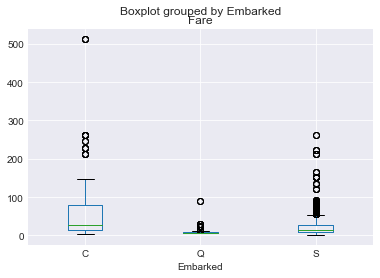

In [26]:
#searhing for sensible feature to fill values
train_df.boxplot(column="Fare", by="Embarked") #fare is sensible

### Fill missing value

In [27]:
#Fare is sensible to fill nan Embarked values
train_df["Embarked"].fillna("C", inplace=True)

In [28]:
train_df[train_df["Fare"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [29]:
#Pclass is sensible to fill nan Fare value
train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3].Fare), inplace=True)

In [30]:
train_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
dtype: int64

<a id="9"></a>
# Visualization

### Correlation between "Age" - "SibSp" - "Parch" -  "Fare" - "Survived"

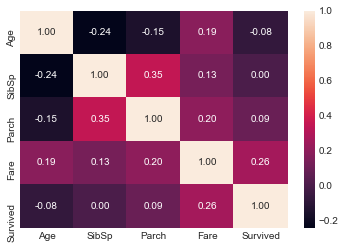

In [31]:
feature_list = ["Age", "SibSp", "Parch", "Fare", "Survived"]
sns.heatmap(train_df[feature_list].corr(), annot=True, fmt=".2f")
plt.show()

### "SibSp" - "Survived"

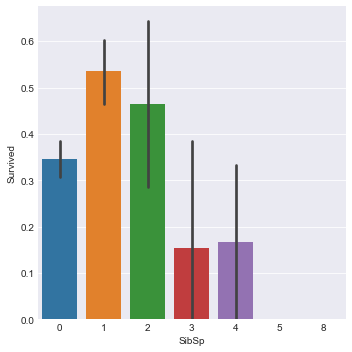

In [32]:
g = sns.factorplot(x="SibSp", y="Survived", data=train_df, kind="bar")
g.set_ylabels = "Survived Probability"

* increasing SibSp value is decreasing chance to survive 
* we can consider SibSp when describing new feature

### "Parch" - "Survived"

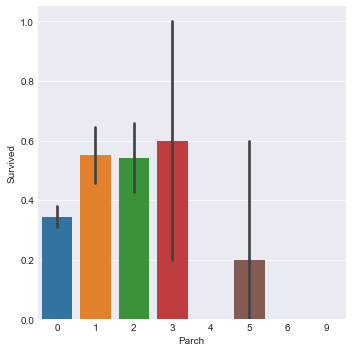

In [33]:
g = sns.factorplot(x="Parch", y="Survived", data=train_df, kind="bar")
g.set_ylabels = "Survived Probability"

* small families have more chance to survive
* SibSp and Parch can be used for new feature extraction with threshold=3
* Parch==3 has big standart deviation

### "Pclass" - "Survived"

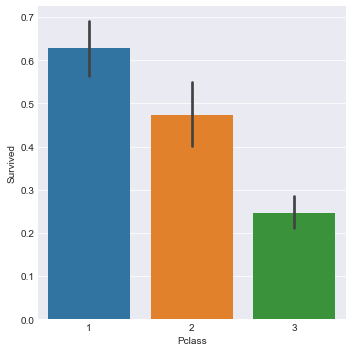

In [34]:
sns.factorplot(x="Pclass", y="Survived", data=train_df, kind="bar")

### "Age" - "Survived"

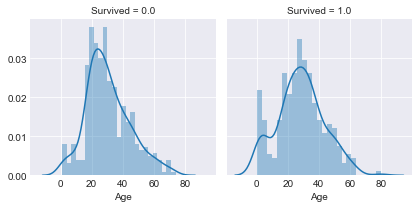

In [35]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age feature to fill in nan values in age

### "Pclass" - "Survived" - "Age"

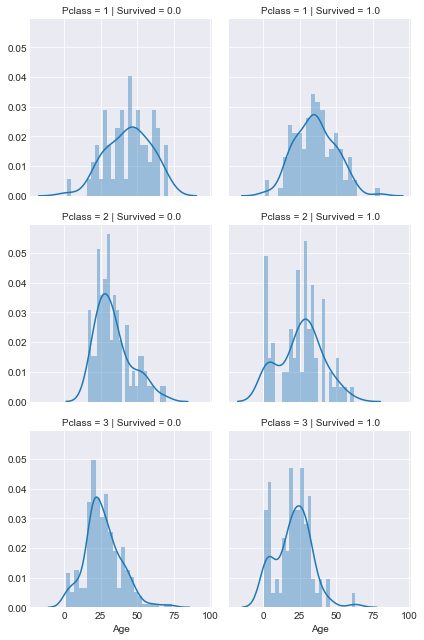

In [36]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(sns.distplot, "Age", bins=25)
plt.show()

* Pclass is a important feature for model training

### "Embarked" - "Sex" - "Pclass" - "Survived"

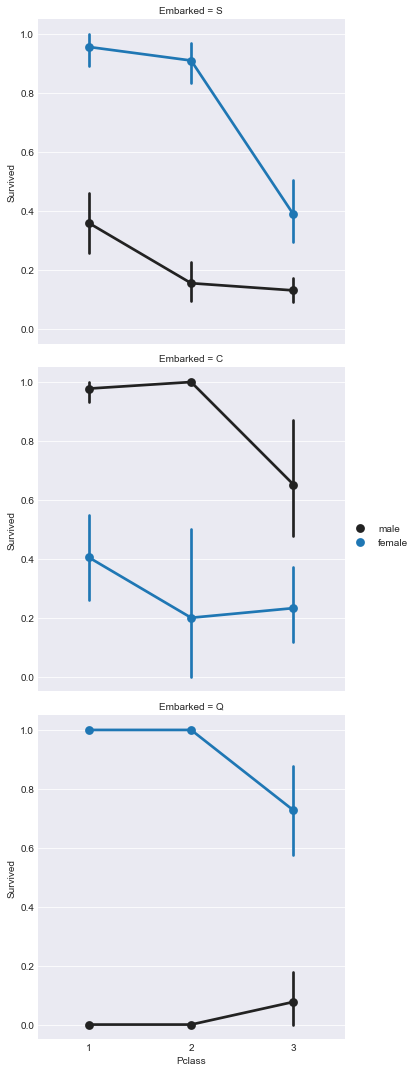

In [37]:
g = sns.FacetGrid(train_df, row="Embarked", size=5)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

* female passengers have more survival rate than males
* male passengers boarding from port c have a better chance of survival
* embarked and sex will be used in training

### "Embarked" - "Sex" - "Fare" - "Survived" 

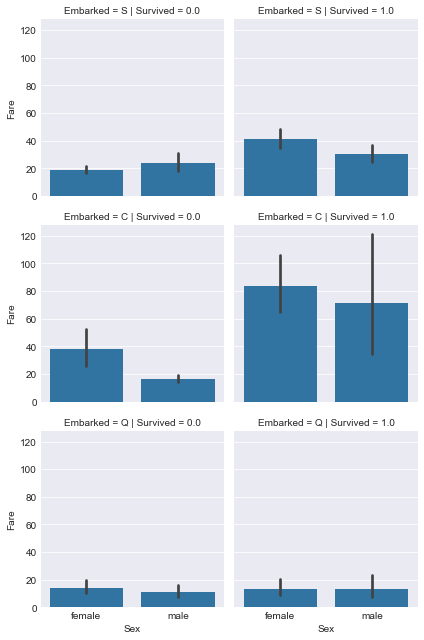

In [38]:
g = sns.FacetGrid(train_df, col="Survived", row="Embarked")
g.map(sns.barplot, "Sex", "Fare")
plt.show()


* higher fare higher survival chance

<a id="10"></a>
# Fill missing: Age Feature

In [39]:
train_df["Age"].isna().sum()

256

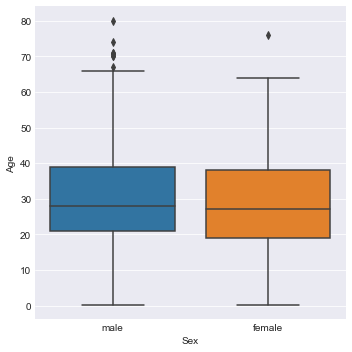

In [40]:
sns.factorplot(x="Sex", y="Age", data=train_df, kind="box") #easy to see there is not any relation between age and sex

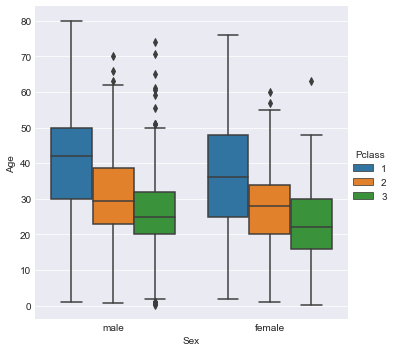

In [41]:
sns.factorplot(x="Sex", y="Age", data=train_df, hue="Pclass", kind="box")#negative correlation between "Pclass" and "Age"

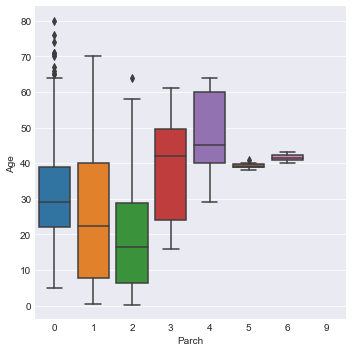

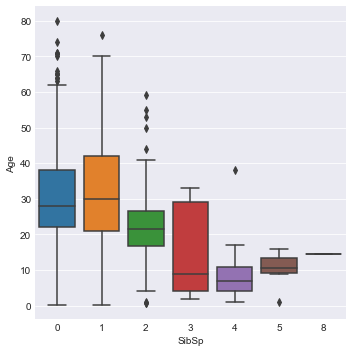

In [42]:
sns.factorplot(x="Parch", y="Age", data=train_df, kind="box")
sns.factorplot(x="SibSp", y="Age", data=train_df, kind="box")

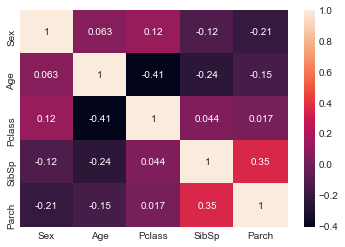

In [43]:
if not (train_df["Sex"][0] == 0 or train_df["Sex"][0] == 1):
    train_df["Sex"] = [1 if each == "male" else 0 for each in train_df["Sex"]]
sns.heatmap(train_df[["Sex", "Age", "Pclass", "SibSp", "Parch"]].corr(), annot=True)

Age is not correlated with Sex but it is correlated with Parch, SibSp and Pclass

In [44]:
index_nan_ages = list(train_df[train_df["Age"].isna()].index)
for i in index_nan_ages:
    age_pred = train_df[(train_df["SibSp"] == train_df["SibSp"].iloc[i]) & (train_df["Parch"] == train_df["Parch"].iloc[i]) & (train_df["Pclass"] == train_df["Pclass"].iloc[i])].Age.median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = train_df["Age"].median()
    

In [45]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,1299.000000,881.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,657.093149,0.385925,2.294072,0.645112,29.275343,0.452656,0.372594,32.553794
std,377.743244,0.487090,0.837150,0.478664,13.271220,0.879416,0.857157,50.678106
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,331.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,657.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200
75%,984.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,30.597900
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import math

def MAE(max_leaf, train_X, train_y, test_X, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf, random_state=0)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    mae = mean_absolute_error(prediction, test_y)
    return mae

#clean data
# train_df.dropna(axis=0, inplace=True)
feature_list = ["Pclass", "SibSp", "Parch", "Age", "Sex"]

train_data = train_df.iloc[:881]
train_X = train_data[feature_list]
train_y = train_data.Survived
test_data = train_df.iloc[881:] 
test_X = test_data[feature_list]
test_y = test_data.Survived

#define a model
model = RandomForestRegressor(max_leaf_nodes=200, random_state=0)

# fit model
model.fit(train_X, train_y)

#predict
predictions = model.predict(test_X)
bool_predictions = np.round(predictions)
output = pd.DataFrame({"PassengerId" : test_data.PassengerId, "Survived" : bool_predictions.astype(int)})
output.Survived
output.to_csv("submission.csv", index=False)
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

#find optimal leaf node -> 14 
# for v in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
#     print(str(v) + " leaf -> " +  "mae :" + str(MAE(v, train_X, train_y, test_X, train_y)))



In [7]:
train_df["_missing" + train_df.columns[0]] = train_df.Sex.isna()
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,_missingPassengerId
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
